In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ast
import json

In [ ]:
ingredients_df = pd.read_csv('data/recipes.csv')

In [ ]:
# Load the data
comp_path = 'data/flavor_network_data/ingr_comp/comp_info.tsv'
comp_tsv = pd.read_csv(comp_path, delimiter='\t')

comp_df = pd.DataFrame(data = comp_tsv)
comp_columns = ['compound_id', 'compound_name', 'CAS_number']
comp_df.columns = comp_columns

ingr_path = 'data/flavor_network_data/ingr_comp/ingr_info.tsv'
ingr_tsv = pd.read_csv(ingr_path, delimiter='\t')

ingr_df = pd.DataFrame(data = ingr_tsv)
ingr_columns = ['ingredient_id', 'ingredient_name', 'ingredient_category']
ingr_df.columns = ingr_columns

ingr_comp_pathh = 'data/flavor_network_data/ingr_comp/ingr_comp.tsv'
ingr_comp_tsv = pd.read_csv(ingr_comp_pathh, delimiter='\t')


In [ ]:
ingr_comp_df = pd.DataFrame(data = ingr_comp_tsv)

In [ ]:
ingr_comp_df.columns

In [ ]:
ingr_comp_df.rename(columns={
    '# ingredient id': 'ingredient_id',
    'compound id': 'compound_id'
}, inplace=True)

In [ ]:
flav_edges_path = 'data/flavor_network_data/flavor_network_backbone/flavor_network_backbone_edges.tsv'
flav_edges_tsv = pd.read_csv(flav_edges_path, delimiter='\t')

flav_edges_df = pd.DataFrame(data = flav_edges_tsv)
flav_edges_columns = ['ingredient_1', 'ingredient_2', 'number_of_shared_compounds']
flav_edges_df.columns = flav_edges_columns

flav_nodes_path = 'data/flavor_network_data/flavor_network_backbone/flavor_network_backbone_nodes.tsv'
flav_nodes_tsv = pd.read_csv(flav_nodes_path, delimiter='\t')

flav_nodes_df = pd.DataFrame(data = flav_nodes_tsv)
flav_nodes_columns = ['ingredient_name', 'x_coordinate', 'y_coordinate', 'prevalence', 'r', 'g', 'b']
flav_nodes_df.columns = flav_nodes_columns

In [ ]:
# Function to replace spaces with underscores
def replace_spaces(value):
    if isinstance(value, str):
        return value.replace(' ', '_')
    return value

In [ ]:
ingr_df['ingredient_name'] = ingr_df['ingredient_name'].apply(replace_spaces)
ingr_df['ingredient_category'] = ingr_df['ingredient_category'].apply(replace_spaces)
flav_edges_df['ingredient_1'] = flav_edges_df['ingredient_1'].apply(replace_spaces)
flav_edges_df['ingredient_2'] = flav_edges_df['ingredient_2'].apply(replace_spaces)
flav_nodes_df['ingredient_name'] = flav_nodes_df['ingredient_name'].apply(replace_spaces)

In [ ]:
# Load the data
file_path = 'data/flavor_network_data/scirep-cuisines-detail/map.txt'
mapping = pd.read_csv(file_path, delimiter='\t', header=None, names=['country', 'region'])

# Clean the data
mapping['country'] = mapping['country'].str.strip()
mapping['region'] = mapping['region'].str.strip()

# Get unique regions and countries
unique_regions = mapping['region'].unique()
unique_countries = mapping['country'].unique()

regions_countries = mapping.groupby('region')['country'].apply(list).reset_index()

In [ ]:
# Define the cuisine mapping with adjectival forms and variations
cuisine_mapping = {
    'vietnamese': ['vietnamese', 'vietnam'],
    'indian': ['indian', 'india'],
    'spanish_portuguese': ['spanish_portuguese'],
    'jewish': ['jewish'],
    'french': ['french', 'france'],
    'central_south_american': ['central_southamerican'],
    'cajun_creole': ['cajun_creole'],
    'thai': ['thai', 'thailand'],
    'scandinavian': ['scandinavian', 'scandinavia'],
    'greek': ['greek'],
    'american': ['american'],
    'african': ['african'],
    'middle_eastern': ['middleeastern', 'middle_eastern', 'turkey', 'iran', 'israel', 'lebanon'],
    'eastern_european_russian': ['easterneuropean_russian', 'eastern-europe', 'russia'],
    'italian': ['italian', 'italy'],
    'irish': ['irish', 'ireland'],
    'mexican': ['mexican', 'mexico'],
    'chinese': ['chinese', 'china'],
    'german': ['german', 'germany'],
    'mediterranean': ['mediterranean'],
    'japanese': ['japanese', 'japan'],
    'moroccan': ['moroccan'],
    'southern_soul_food': ['southern_soulfood'],
    'english_scottish': ['english_scottish', 'uk-and-ireland', 'england', 'scotland'],
    'asian': ['asian'],
    'southwestern': ['southwestern'],
    'east_asian': ['east_asian'],
    'western': ['western'],
    'korean': ['korean', 'korea'],
    'canadian': ['canada'],
    'caribbean': ['caribbean'],
    'bangladeshi': ['bangladesh'],
    'israeli': ['israel'],
    'iranian': ['iran'],
    'south_african': ['south-african'],
    'belgian': ['belgium'],
    'spanish': ['spain'],
    'dutch': ['netherlands'],
    'filipino': ['philippines'],
    'indonesian': ['indonesia'],
    'east_african': ['east-african'],
    'swiss': ['switzerland'],
    'west_african': ['west-african'],
    'north_african': ['north-african'],
    'pakistani': ['pakistan'],
    'portuguese': ['portugal'],
    'malaysian': ['malaysia'],
    'austrian': ['austria']
}

# Reverse the mapping for easier lookup
cuisine_lookup = {alias: cuisine for cuisine, aliases in cuisine_mapping.items() for alias in aliases}



# Create a dictionary from the mapping DataFrame
country_to_region = dict(zip(mapping['country'].str.lower().str.replace(' ', '_'), mapping['region'].str.lower().str.replace(' ', '_')))

# Explicitly format region names
def format_region_name(region):
    if pd.isna(region):
        return 'unknown'
    formatted_region = region.replace('southeastasian', 'south_east_asian') \
        .replace('southasian', 'south_asian') \
        .replace('southerneuropean', 'southern_european') \
        .replace('middleeastern', 'middle_eastern') \
        .replace('westerneuropean', 'western_european') \
        .replace('latinamerican', 'latin_american') \
        .replace('northamerican', 'north_american') \
        .replace('northerneuropean', 'northern_european') \
        .replace('easterneuropean', 'eastern_european') \
        .replace('eastasian', 'east_asian')
    return formatted_region

# Function to standardize country names and map to region
def standardize_and_map_region(country):
    if pd.isna(country):
        return 'unknown', 'unknown'
    country_lower = str(country).lower().replace(' ', '_')
    standardized_country = cuisine_lookup.get(country_lower, country_lower)
    region = country_to_region.get(standardized_country, 'unknown')
    return standardized_country, format_region_name(region)



# Apply the function to create new columns
ingredients_df[['country', 'region']] = ingredients_df['country'].apply(lambda x: pd.Series(standardize_and_map_region(x)))

# Move the 'region' column to the beginning
columns = ['region'] + [col for col in ingredients_df if col != 'region']
ingredients_df = ingredients_df[columns]


In [ ]:
ingredients_df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [81]:
ingr_small = ingredients_df.columns.copy()

In [82]:
ingr_small = pd.DataFrame(data=ingr_small)

In [83]:
# Assign column names if necessary
ingr_small.columns = ['ingredient_name']

# Drop rows that contain 'region' or 'country'
ingr_small = ingr_small[~ingr_small['ingredient_name'].isin(['region', 'country'])]

# Add ingredient_id column
ingr_small.insert(0, 'ingredient_id', range(1, 1 + len(ingr_small)))

# Print the cleaned DataFrame
print(ingr_small)

     ingredient_id ingredient_name
2                1          almond
3                2        angelica
4                3           anise
5                4      anise_seed
6                5           apple
..             ...             ...
380            379            wood
381            380             yam
382            381           yeast
383            382          yogurt
384            383        zucchini

[383 rows x 2 columns]


In [84]:
ingr_small['ingredient_name'] = ingr_small['ingredient_name'].apply(replace_spaces)

In [85]:
# Function to replace ingredient IDs
def replace_ingredient_id(ingr_small, ingr_df):
    # Create a dictionary for quick lookup of ingredient_id by ingredient_name
    ingr_dict = pd.Series(ingr_df.ingredient_id.values, index=ingr_df.ingredient_name).to_dict()

    # Function to replace ingredient_id if ingredient_name matches
    def replace_id(row):
        ingredient_name = row['ingredient_name']
        if ingredient_name in ingr_dict:
            row['ingredient_id'] = ingr_dict[ingredient_name]
        return row

    # Apply the function to each row in ingr_small
    ingr_small = ingr_small.apply(replace_id, axis=1)

    return ingr_small

# Apply the function
ingr_small = replace_ingredient_id(ingr_small, ingr_df)

# Verify the changes
print(ingr_small.head())

   ingredient_id ingredient_name
2             18          almond
3            725        angelica
4            707           anise
5            395      anise_seed
6           1197           apple


In [86]:
ingr_small_def = ingr_small.copy()

In [ ]:
ingr_small = ingr_small_def.copy()

In [77]:
comp_df

,compound_id,compound_name,CAS_number
0,0,jasmone,488-10-8
1,1,5-methylhexanoic_acid,628-46-6
2,2,l-glutamine,56-85-9
3,3,1-methyl-3-methoxy-4-isopropylbenzene,1076-56-8
4,4,methyl-3-phenylpropionate,103-25-3
...,...,...,...
1102,1102,2-heptanol,543-49-7
1103,1103,1-octen-3-yl_butyrate,16491-54-6
1104,1104,guaiacol,90-05-1
1105,1105,(+/?)-methyl_5-acetoxyhexanoate,35234-22-1


In [87]:
ingr_comp_merge = ingr_comp_df.copy()

In [89]:
ingr_comp_merge.compound_id = ingr_comp_merge.compound_id.astype(str)

In [90]:
ingr_small['ingredient_id'] = ingr_small['ingredient_id'].astype(str)
ingr_comp_df['ingredient_id'] = ingr_comp_df['ingredient_id'].astype(str)
ingr_comp_df['compound_id'] = ingr_comp_df['compound_id'].astype(str)

# Convert column names in ingr_small to strings
ingr_small.columns = ingr_small.columns.astype(str)

# Get the unique compound_ids in ingr_comp_df
compound_id_list = ingr_comp_df['compound_id'].unique()

# Create a DataFrame to hold the new columns with initial values set to 0
new_columns_df = pd.DataFrame(0, index=ingr_small.index, columns=compound_id_list)

# Concatenate the new columns to ingr_small
ingr_small = pd.concat([ingr_small, new_columns_df], axis=1)

# Iterate through ingr_comp_df and update the values in ingr_small
for index, row in ingr_comp_df.iterrows():
    ingredient_id = row['ingredient_id']
    compound_id = row['compound_id']
    if ingredient_id in ingr_small['ingredient_id'].values:
        ingr_small.loc[ingr_small['ingredient_id'] == ingredient_id, compound_id] = 1

# Verify the result
print(ingr_small.head())

  ingredient_id ingredient_name  906  861  673  278  171  387  165  1099  ...  \
2            18          almond    0    0    0    0    0    0    0     0  ...   
3           725        angelica    0    0    1    0    0    0    0     0  ...   
4           707           anise    0    0    1    0    0    0    1     0  ...   
5           395      anise_seed    0    0    0    0    0    0    0     0  ...   
6          1197           apple    0    0    0    1    0    0    0     0  ...   

   722  237  169  23  310  653  966  752  497  754  
2    0    0    0   0    0    0    0    0    0    0  
3    0    0    0   0    0    0    0    0    0    0  
4    0    0    0   0    0    0    0    0    0    0  
5    0    0    0   0    0    0    0    0    0    0  
6    0    0    0   0    0    0    0    0    0    0  

[5 rows x 1109 columns]


In [93]:
ingr_small.shape

(383, 1109)

In [95]:
compound_id_cols = [col for col in ingr_small.columns if col not in ['ingredient_id', 'ingredient_name']]

In [96]:
ingr_small['count_ones'] = ingr_small[compound_id_cols].sum(axis=1)

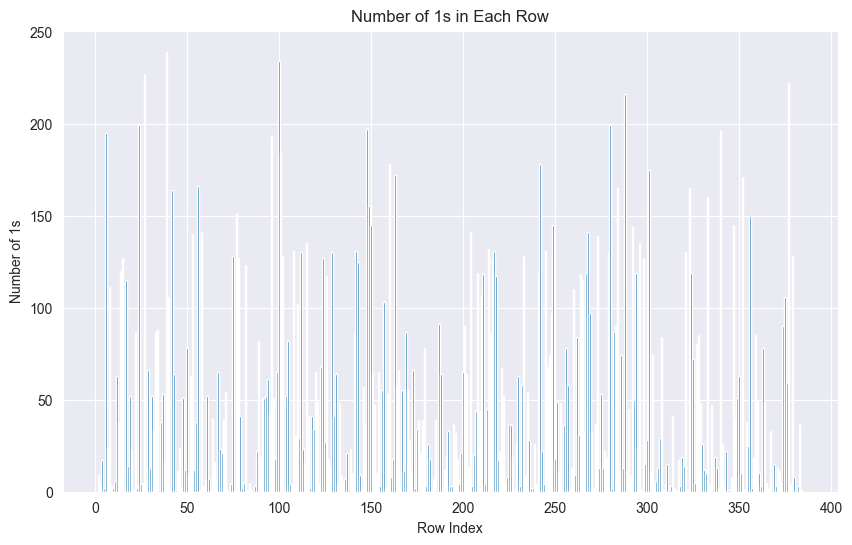

In [97]:
2

In [ ]:
sns.jointplot(data = ingr_small, x = 'ingredient_name', y = 'ingredient_id', kind = 'scatter')

In [98]:
ingr_small

,ingredient_id,ingredient_name,906,861,673,278,171,387,165,1099,...,237,169,23,310,653,966,752,497,754,count_ones
2,18,almond,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,725,angelica,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,707,anise,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,17
5,395,anise_seed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,1197,apple,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1396,wood,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
381,705,yam,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
382,407,yeast,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
383,230,yogurt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
